# Introduction Apple Banana Tomato Classification ResNet50


[Fruits 360](https://www.kaggle.com/moltean/fruits)

- A dataset with 90380 images of 131 fruits and vegetables

- <img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" scale="0">

- This work is licensed under a 
<a rel="license" href="https://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>


# 1. Get images

In [111]:
!git clone https://github.com/lacakp/fruit-ds.git

Cloning into 'fruit-ds'...
remote: Enumerating objects: 17153, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 17153 (delta 1), reused 6 (delta 1), pack-reused 17133
Receiving objects: 100% (17153/17153), 376.56 MiB | 33.47 MiB/s, done.
Resolving deltas: 100% (50/50), done.


## Check images

In [143]:
print("All train image in 3 class apple, banana, tomato")
!ls /content/fruit-ds/train/*/* | wc -l 

print("\n------------------")

print("Apple image count")
!ls /content/fruit-ds/train/apple/* | wc -l 

print("Banana Image Count")
!ls /content/fruit-ds/train/banana/* | wc -l 

print("Tomato Image Count")
!ls /content/fruit-ds/train/tomato/* | wc -l 

All train image in 3 class apple, banana, tomato
4290

------------------
Apple image count
1430
Banana Image Count
1430
Tomato Image Count
1430


# 2. Preparing train and validation data

### Import libraly

In [113]:
import tensorflow as tf

TensorFlow เป็นไลบรารีสำหรับใช้พัฒนา machine learning เป็น Open source (เขียนด้วย Python) ที่พัฒนาโดยกูเกิล โดยกูเกิลได้ปล่อย TensorFlow ซึ่งเป็นไลบรารีสำหรับใช้พัฒนา machine learning ที่ใช้งานกันในกูเกิลเอง ให้กลายเป็นโปรแกรม Open source (ใช้ Apache 2.0 สามารถนำไปใช้เพื่อการค้าได้) และมาพร้อมกับ TensorBoard

### Setting path and shape image

In [114]:
train_data_path = '/content/fruit-ds/train'
height = 224
width = 224
batch_size = 32

batch_size ขนาดของ Batch ซึ่งก็คือจำนวนรายการข้อมูลที่จะให้ Optimiser คำนวนในหนึ่งครั้ง เช่น ข้อมูลมี 2,000 รายการ ถ้ากำหนด Batch size เป็น 32 แปลว่า Optimiser จะต้องทำงาน 62.5 ครั้ง จึงจะครบทั้ง 2,000 รายการ และถ้ากำหนด Epoch เป็น 20 ก็หมายถึงการทำงาน 62.5 ครั้ง 20 รอบ

### Training data

split image from path 70% to training data

In [115]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_path,
    validation_split = 0.3,
    subset = 'training',
    seed = 123,
    image_size = (height, width),
    batch_size = batch_size
)

Found 4290 files belonging to 3 classes.
Using 3003 files for training.


### Validation data

In [116]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_path,
    validation_split = 0.3,
    subset = 'validation',
    seed = 123,
    image_size = (height, width),
    batch_size = batch_size
)

Found 4290 files belonging to 3 classes.
Using 1287 files for validation.


### Get Class

In [117]:
classes = train_ds.class_names
print(classes)
print(train_ds)

['apple', 'banana', 'tomato']
<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>


# 3. Training the model

## Import ResNet50

In [118]:
from tensorflow.keras.applications import ResNet50

In [119]:
model = ResNet50(weights='imagenet')

## Modifying the model

In [120]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

### Import libraly

In [121]:
from keras import Model
from keras.layers import Dense

### Custom model

In [122]:
abt_output = Dense(3, activation='softmax')
abt_output = abt_output(model.layers[-2].output)

abt_input = model.input
abt_model = Model(inputs=abt_input, outputs=abt_output)

for layer in abt_model.layers[:-1]:
  layer.trainable = False

### Compile model

In [123]:
abt_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

ทำการ รวบรวมโมเดล (Compile model) เพื่อให้พร้อมสำหรับการฝึก ในการคอมไพล์นี้ เราต้องระบุ 3 พารามิเตอร์คือ 

__Loss__

 คือฟังก์ชันชันการสูญเสีย ซึ่งเป็นอัลกอริทึมที่กำหนดว่าการคาดการณ์หรือการทำนายของโมเดลผิดพลาดเพียงใด เป้าหมายของการฝึก (Train) คือการลดความสูญเสีย (loss) เราจะใช้ sparse categorical crossentropy ซึ่งถือว่า ถ้าค่า เลเบลเป็น 0 หมายความว่า เซลล์ประสาทแรกในเลเยอร์เอาต์พุต ทำงานมากที่สุด เช่นกันหากการทำงานที่ค่า เลเบล 1 หมายความว่าเซลล์ประสาทที่สองทำงานมากที่สุด และเลเบลที่ 2 แสดงว่าเซลล์ประสาทที่สามทำงานมากที่สุดนั่นเอง

__Optimizer__

เราจะระบุอัลกอริทึมที่จะใช้ในการปรับน้ำหนักในแบบจำลอง (Model) ซึ่งเราจะใช้ Adam 

__Accuracy__
 คือความแม่นยำของโมเดลว่า ทำนายได้แม่นยำเพียงใด (ในส่วนนี้เป็นการแสดงภาพไม่ได้ส่งผลใดๆในการเทรน)


In [124]:
abt_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

## Training

การเทรนโมเดล เราเพียงแค่เรียกใช้ฟังก์ชัน fit() ระหว่างการฝึก โมเดลจะถูกปรับเพื่อลดค่า loss ให้เหลือน้อยที่สุด epochs คือ การระบุจำนวนครั้งที่ทำการเทรน เราระบุ 4 epoch หมายถึงเราทำการเรียกใช้ ฟังก์ชัน fit() 4 ครั้งติดต่อกันด้วยข้อมูลเดียวกัน

In [125]:
ABTFruit = abt_model.fit(train_ds,
                     validation_data = val_ds, 
                     epochs=4
                     )

Epoch 1/4
94/94 [==============================] - 37s 346ms/step - loss: 0.1564 - accuracy: 0.9434 - val_loss: 0.0207 - val_accuracy: 1.0000
Epoch 2/4
94/94 [==============================] - 30s 312ms/step - loss: 0.0138 - accuracy: 1.0000 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 3/4
94/94 [==============================] - 30s 308ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 4/4
94/94 [==============================] - 29s 308ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000


# 4. Prediction and Evaluation Model




## Training Graph

In [126]:
import matplotlib.pyplot as plt

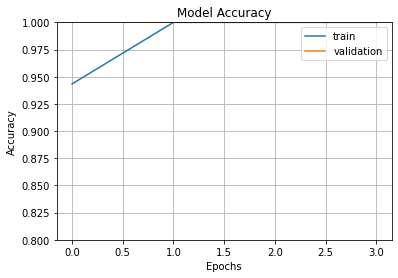

In [127]:
# Model Accuracy
plt.plot(ABTFruit.history['accuracy'])
plt.plot(ABTFruit.history['val_accuracy'])
plt.axis(ymin=0.8, ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

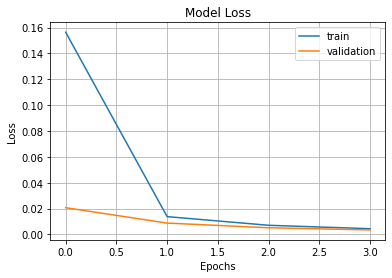

In [128]:
# Model Loss
plt.plot(ABTFruit.history['loss'])
plt.plot(ABTFruit.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

## Predictions

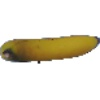

[[1.7795411e-04 9.9980432e-01 1.7723252e-05]]
<class 'numpy.ndarray'>
[1.7795411e-04 9.9980432e-01 1.7723252e-05]
แอปเปิล 0.02 %
กล้วย 99.98 %
มะเขือเทศ 0.00 %


In [131]:
image = cv2.imread('/content/fruit-ds/test/banana/banana (10).jpg')
cv2_imshow(image)
resized = cv2.resize(image, (224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(resized)
img_array = tf.expand_dims(img_array, 0)
pred = abt_model.predict(img_array)
print(pred)
print(type(pred))

score = pred[0]
print(score)
print("แอปเปิล {:.2f} %".format(score[0]*100))
print("กล้วย {:.2f} %".format(score[1]*100))
print("มะเขือเทศ {:.2f} %".format(score[2]*100))

### Classification_report

In [132]:
import numpy as np
from imageio import imread
from google.colab.patches import cv2_imshow
from skimage.transform import resize
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report

In [133]:
test_data_path = '/content/fruit-ds/test'
batch_size=32

In [135]:
print("All test image in 3 class apple, banana, tomato")
!ls /content/fruit-ds/test/*/* | wc -l 

print("\n------------------")

print("Apple image count")
!ls /content/fruit-ds/test/apple/* | wc -l 


print("Banana Image Count")
!ls /content/fruit-ds/test/banana/* | wc -l 


print("Tomato Image Count")
!ls /content/fruit-ds/test/tomato/* | wc -l 

All test image in 3 class apple, banana, tomato
1200

------------------
Apple image count
400
Banana Image Count
400
Tomato Image Count
400


In [136]:
data = np.empty((1200, 224, 224, 3))

Apples Images from test folder 400 image

In [137]:
for i in range(400):
    im = imread('/content/fruit-ds/test/apple/apple ({}).jpg'.format(i+1))
    im = preprocess_input(im)
    im = resize(im, output_shape=(224, 224))
    data[i] = im

Bananas Images from test folder 400 image

In [138]:
for i in range(400):
    im = imread('/content/fruit-ds/test/banana/banana ({}).jpg'.format(i+1))
    im = preprocess_input(im)
    im = resize(im, output_shape=(224, 224))
    data[i + 400] = im

tomatoes Images from test folder 400 image

In [139]:
for i in range(400):
    im = imread('/content/fruit-ds/test/tomato/tomato ({}).jpg'.format(i+1))
    im = preprocess_input(im)
    im = resize(im, output_shape=(224, 224))
    data[i + 800] = im

Assign true labels value

In [140]:
# Generating labels
labels = np.empty(1200, dtype=int)
labels[:400] = 0
labels[400:800] = 1
labels[800:] = 2

classes = ['apple', 'banana', 'tomato']

use classification_report library

https://scikit-learn.org/0.15/modules/generated/sklearn.metrics.classification_report.html

In [141]:
y_pred = abt_model.predict(data, batch_size=32, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(labels, y_pred_bool, target_names=classes))

38/38 [==============================] - 7s 196ms/step
              precision    recall  f1-score   support

       apple       0.97      1.00      0.99       400
      banana       0.95      1.00      0.97       400
      tomato       1.00      0.92      0.96       400

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



# 5. Deploy Model

## Save Model

In [108]:
abt_model.save('abt_resnetmodel', save_format='h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
